# DS-211 : Aug-2021 : PS-3

# **Ques:1**:**Conjugate Gradient**

(a) [0.5 point]

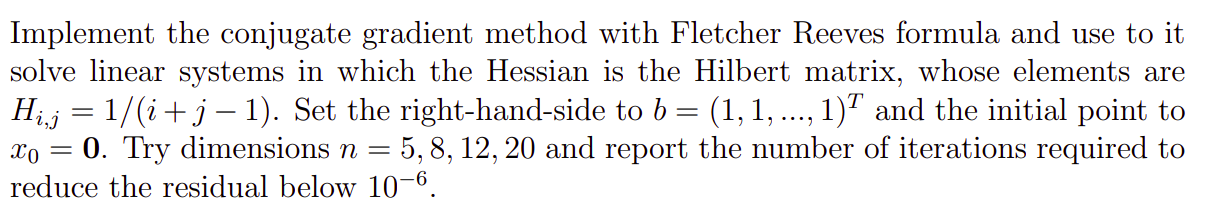




In [214]:
import numpy as np
from scipy.linalg import hilbert
def FR_(n):
  H = hilbert(n)
  b = np.ones((n,1))
  x = np.zeros((n,1))
  grad_x = H @ x - b
  p = -grad_x
  rk = grad_x
  count = 0
  while np.linalg.norm(rk,2) > 1e-6:
    alpha = (rk.T @ rk)/(p.T @ H @ p)
    xk = x + alpha * p
    grad_xk = H @ xk - b
    beta = (grad_xk.T @ grad_xk)/(grad_x.T @ grad_x)
    pk = -grad_xk + beta * p
    rk = rk + alpha * (H @ p)
    p = pk
    x = xk
    grad_x = grad_xk
    count += 1 
  print("Value of n : ",n)
  print("No of iteration : ",count)
  print("--------------------------------------------")
  return H,x

In [215]:
H,x = FR_(5)
H,x = FR_(8)
H,x = FR_(12)
H,x = FR_(20)

Value of n :  5
No of iteration :  6
--------------------------------------------
Value of n :  8
No of iteration :  20
--------------------------------------------
Value of n :  12
No of iteration :  49
--------------------------------------------
Value of n :  20
No of iteration :  109
--------------------------------------------


(b) [0.5 point]

# Repeat (a) using preconditioned Conjugate gradient and check whether is there any improvement in convergence.

In [216]:
#preconditioned conjugate gradient method
import sklearn 
from sklearn import datasets 

def PC_(n):
  M = sklearn.datasets.make_spd_matrix(n)
  H = hilbert(n)
  b = np.ones((n,1))
  x = np.zeros((n,1))
  grad_x = H @ x - b
  r = grad_x
  y = np.linalg.inv(M)@r
  p = -y
  count = 0
  while np.linalg.norm(r,2) > 1e-6:
    alpha = (r.T @ y)/(p.T @ H @ p)
    xk = x + alpha * p
    rk = r + alpha * (H @ p)
    yk = np.linalg.inv(M)@rk
    grad_xk = H @ xk - b
    beta = (rk.T @ yk)/(r.T @ y)
    pk = -yk + beta * p
    p = pk
    x = xk
    r = rk
    y = yk
    count += 1 
  print("Value of n : ",n)
  print("No of iteration : ",count)
  print("--------------------------------------------")
  return H,x

In [219]:
H,x = PC_(5)
H,x = PC_(8)
H,x = PC_(12)
H,x = PC_(20)

Value of n :  5
No of iteration :  7
--------------------------------------------
Value of n :  8
No of iteration :  19
--------------------------------------------
Value of n :  12
No of iteration :  37
--------------------------------------------
Value of n :  20
No of iteration :  62
--------------------------------------------


## **NOTE**
*   From above two example we can see that number of iteration required to converge preconditioned conjugate gradient method are less than CG method
*   Choice of M is important in preconditioned CG otherwise ill effect can be observed on convergence compared to CG.



(c) [1 point]

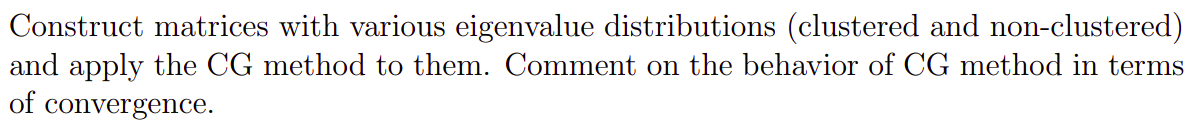

In [258]:
def CG_(H,n):
  b = np.ones((n,1))
  x = np.zeros((n,1))
  grad_x = H @ x - b
  p = -grad_x
  rk = grad_x
  count = 0
  while np.linalg.norm(rk,2) > 1e-6:
    alpha = (rk.T @ rk)/(p.T @ H @ p)
    xk = x + alpha * p
    grad_xk = H @ xk - b
    beta = (grad_xk.T @ grad_xk)/(grad_x.T @ grad_x)
    pk = -grad_xk + beta * p
    rk = rk + alpha * (H @ p)
    p = pk
    x = xk
    grad_x = grad_xk
    count += 1 
  print("Number of Iteration : ",count)
  return H,x

In [259]:
# Constructing the matix with clustered eigen value distribution
d1 = np.diag([1,1,1,2,2,2,2,7,7,7])
from scipy.linalg import qr
h1 = np.random.randn(10, 10)
U, R = qr(h1)
H1 = U @ d1 @ U.T

# Constructing the matix with non-clustered eigen value distribution
d2 = np.diag([1,1,2,4,6,7,8,9,10,11])
h2 = np.random.randn(10, 10)
U, R = qr(h2)
H2 = U @ d2 @ U.T

## Clustered and Non-Clustered eigen values

In [260]:
print("Clustered Eigenvalue decomposition")
H1,x1 = CG_(H1,10)

Clustered Eigenvalue decomposition
Number of Iteration :  3


In [261]:
print("Non-Clustered Eigenvalue decomposition")
H2,x2 = CG_(H2,10)

Non-Clustered Eigenvalue decomposition
Number of Iteration :  9


## **Note:**
*   From above there are 3 eigenvalues cluster I have taken in first example,So iterations required to converge CG are equal to number of eigenvalue clusters which is less than number of independent eigenvectors. 



(c) [1 point]

# Refer to Question-1 of problem set 1 and solve the least squares problem for optimal 'n' using CG algorithm.

In [251]:
def CGLS_(H,b):
  M = sklearn.datasets.make_spd_matrix(5)
  x = np.random.randn(5)
  x = np.reshape(x,(-1,1))
  grad_x = H @ x - b
  r = grad_x
  y = np.linalg.inv(M)@r
  p = -y
  count = 0
  while np.linalg.norm(r,2) > 1e-6:
    alpha = (r.T @ y)/(p.T @ H @ p)
    xk = x + alpha * p
    rk = r + alpha * (H @ p)
    yk = np.linalg.inv(M)@rk
    grad_xk = H @ xk - b
    beta = (rk.T @ yk)/(r.T @ y)
    pk = -yk + beta * p
    p = pk
    x = xk
    r = rk
    y = yk
    count += 1 
  print("polynomial degree : 4")
  print("Number of Iteration : ",count)
  return H,x

In [252]:
import math
data = np.load('data_x.npy')
print("Number of data points =",data.shape[0])
mean = data.sum()/data.shape[0]
print("mean =",mean)
k = 4                             
l = 750
mean = 59.54743292509804
variance = 97.42344563121536
X = np.zeros((l,k+1))
for i in range(l):
  X[i,0] = 1
  m = 1
  for j in range(1,k+1):
    X[i,j] = data[i]**m
    m = m + 1
#Forming right hand side of equation
y = []
for i in data[0:750]:
  Y = (math.exp(-(i - mean)**2/(2*variance)))/(math.sqrt(variance * 2 * 3.142))
  y.append(Y)
 
b = np.array(y)
b = np.reshape(b,(-1,1))

Number of data points = 1000
mean = 59.54743292509804


In [253]:
#Applying Conjugate gradient Method for Least-Square
H = X.T @ X
b = X.T @ b
H,x = CGLS_(H,b)

polynomial degree : 4
Number of Iteration :  20


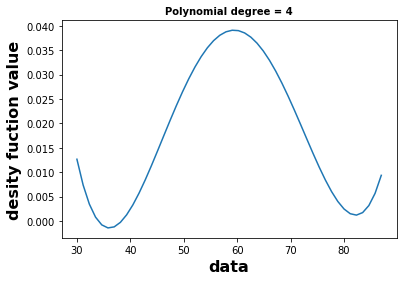

In [257]:
import matplotlib.pyplot as plt
coeffs = np.reshape(x,k+1)                       #saving the solution
coeffs = list(coeffs)
x_ = np.linspace(30, 87, 50)
y = np.array([np.sum(np.array([coeffs[i]*(j**i) for i in range(len(coeffs))])) for j in x_])
plt.plot(x_, y)
plt.title('Polynomial degree = 4', fontsize = 10,fontweight='bold')
plt.xlabel('data',fontsize=16,fontweight='bold')
plt.ylabel('desity fuction value',fontsize=16,fontweight='bold')
plt.show()

# **Ques:2** : **Trust Region Strategy**

(a) [1 point]

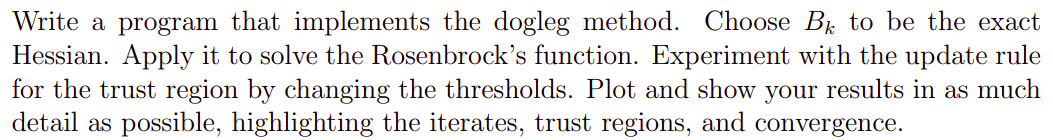


In [265]:
def fun(z1,z2):
  return 100*(z2 - z1**2)**2 - (1 - z1)**2

In [266]:
def model_f(fxk,pk,gk,Bk):
  return fxk + pk.T@gk + 0.5*(pk.T@Bk@pk)

In [267]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D

b=100
def f(v):
  x = v[0]
  y = v[1]
  return (x - 1)**2 + b*((y - x**2)**2)

def grad_f(v):
  x = v[0]
  y = v[1]
  f_dot = np.zeros([2,1])
  f_dot[0,0] = 2*(x - 1) + 2*b*(y - x**2)*(-2*x)
  f_dot[1,0] = 2*b*(y - x**2)
  return f_dot

def Hessian(v):
  x = v[0]
  y = v[1]
  h = np.zeros([2,2])
  h[0,0] = 2 - 4*b*(y - 3*x**2)
  h[0,1] = -4*b*x
  h[1,0] = -4*b*x
  h[1,1] = 2*b

  return h

def get_tau(pu,pb,delta):
  pb_pu = pb - pu
  pb_pu_sq = np.dot(pb_pu.T, pb_pu)
  pu_pb_pu_sq = np.dot(pu.T, pb_pu)
  d = pu_pb_pu_sq ** 2 - pb_pu_sq * (np.dot(pu.T, pu) - delta ** 2)
  tau = (-pu_pb_pu_sq + np.sqrt(d)) / pb_pu_sq+1
  return tau

def dogleg_step(g,H,delta):
  pb = -np.linalg.inv(H) @ g
  pu = -(g.T @ g)*g/(np.dot(np.dot(g.T,H),g))

  if np.linalg.norm(pb) <= delta:
    return(pb)
  if np.linalg.norm(pu) >= delta:
      return (delta / np.linalg.norm(pu)) * pu
  tau = get_tau(pu,pb,delta)
  if tau >= 0 and tau <= 1:
    return tau*pu
  if tau >=1 and tau <= 2:
    return pu + (tau - 1)*(pb - pu)
  print("Invalid Taw")

def m(v,p,B):
  return f(v) + p.T @ grad_f(v) + 0.5*np.dot(p.T, np.dot(B, p))

def trust_region(x,tr):
  delta = tr
  
  update_list = []
  radius_list = []
  last_update = 0
  for i in range(0,5000):
    g = grad_f(x)
    H = Hessian(x)
    pk = dogleg_step(g,H,delta)
    rho = (f(x) - f(x + pk))/(m(x,np.zeros([2,1]),H) - m(x,pk,H))
    if rho < 0.25:
      delta  = 0.25* np.linalg.norm(pk)
    else:
      if rho >= .75 and np.isclose(np.linalg.norm(pk), delta, 1e-8):
        delta = min(2*delta, 1)
      else:
        delta = delta
    if rho > 0.15:
      x = x + pk
    else:
      x = x
      if np.linalg.norm(g) < 1e-4:
        break
    update_list.append(x)
    radius_list.append(delta)
  print("Final Solution: ", x.flatten())
  return np.array(update_list).reshape(-1,2), radius_list


In [268]:
def visualize(xx,r):
  x = np.linspace(-3, 3, 100)
  y = np.linspace(-3, 3, 100)
  X, Y = np.meshgrid(x, y)
  Z = (1-X)**2 + 100*(Y-X**2)**2
  fig, ax = plt.subplots()
  fig.set_figheight(10)
  fig.set_figwidth(20)
  cp = ax.contour(x,y,Z, np.arange(2,10)**4)
  ax.plot(xx[:,0],xx[:,1], '-o', color='black', markersize=4)
  color = ['red','green','blue','yellow']
  for i in range(len(r)):
      circle1 = plt.Circle(xx[i], radius=r[i],facecolor = color[(i+1)%len(color)],alpha = 0.2)
      ax.add_artist(circle1)
  ax.clabel(cp, inline=True, fontsize=32)
  ax.set_title('Plot showing trust region', fontsize = 32,fontweight='bold')
  ax.set_xlabel('X',fontsize=16,fontweight='bold')
  ax.set_ylabel('Y',fontsize=16,fontweight='bold')
  ax.annotate('point of minima [1,1]',
          xy=(1, 1.1), xycoords='data',
          xytext=(-15, 25), textcoords='offset points',
          arrowprops=dict(facecolor='black', shrink=0.05),
          horizontalalignment='right', verticalalignment='bottom',fontsize = 18)

  plt.show()

## For Delta 0.8

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:68: RuntimeWarning: invalid value encountered in true_divide


Final Solution:  [1. 1.]


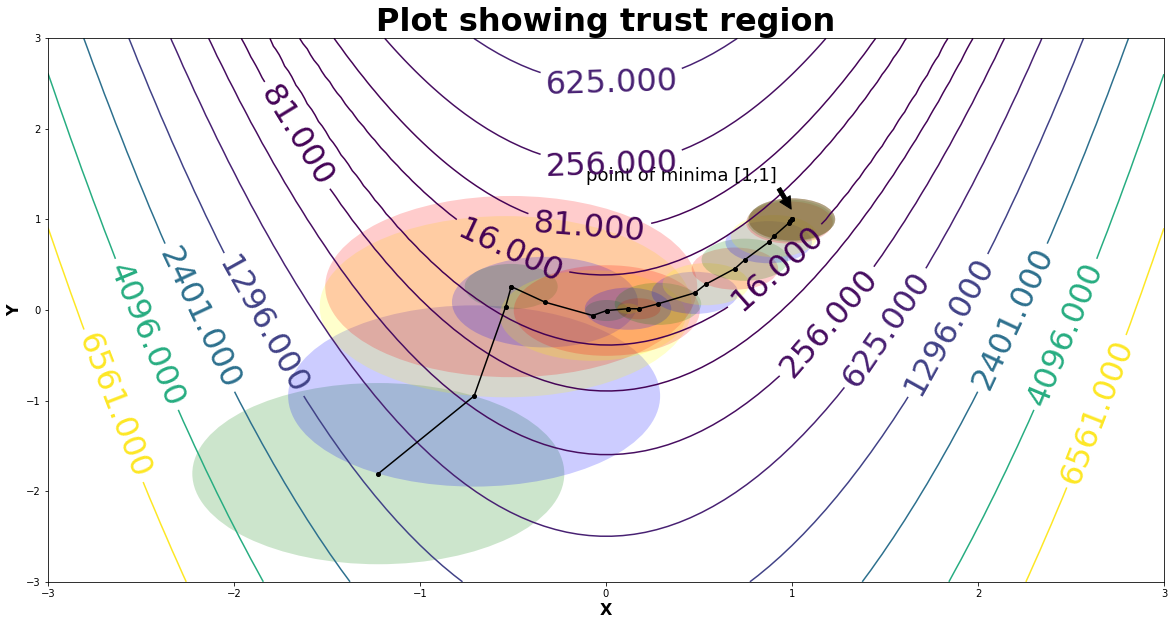

In [270]:
x = np.array([-2,-2]).reshape(-1,1)
update_list,r = trust_region(x,0.8)
visualize(update_list,r)

## For Delta 0.5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:68: RuntimeWarning: invalid value encountered in true_divide


Final Solution:  [1. 1.]


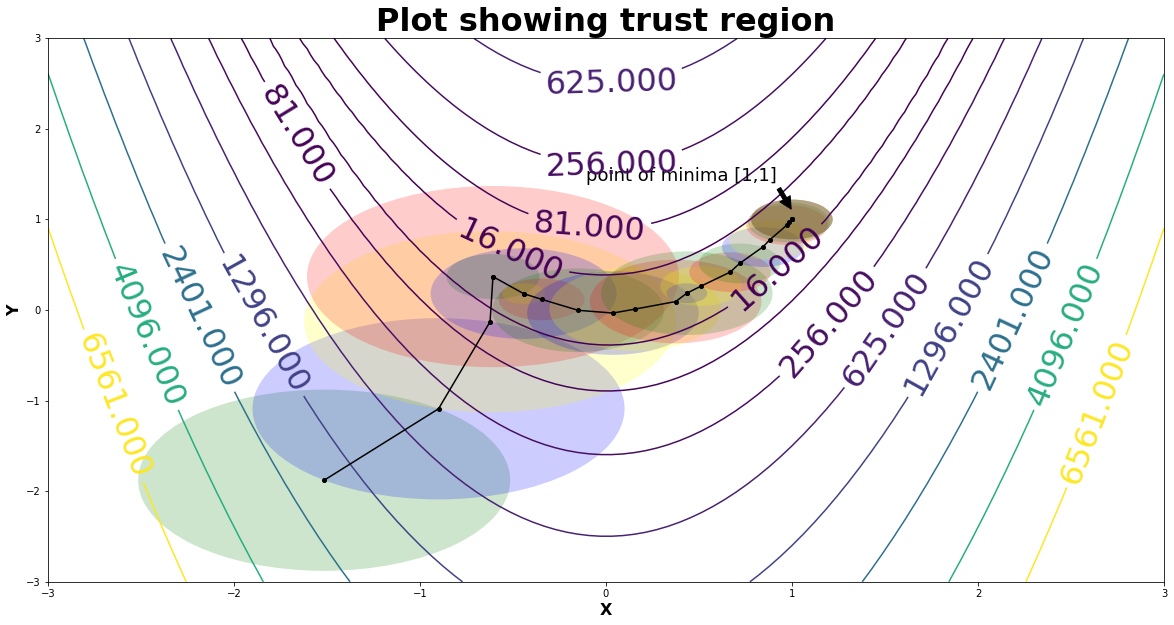

In [271]:
x = np.array([-2,-2]).reshape(-1,1)
update_list,r = trust_region(x,0.5)
visualize(update_list,r)

## For Delta 2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:68: RuntimeWarning: invalid value encountered in true_divide


Final Solution:  [1. 1.]


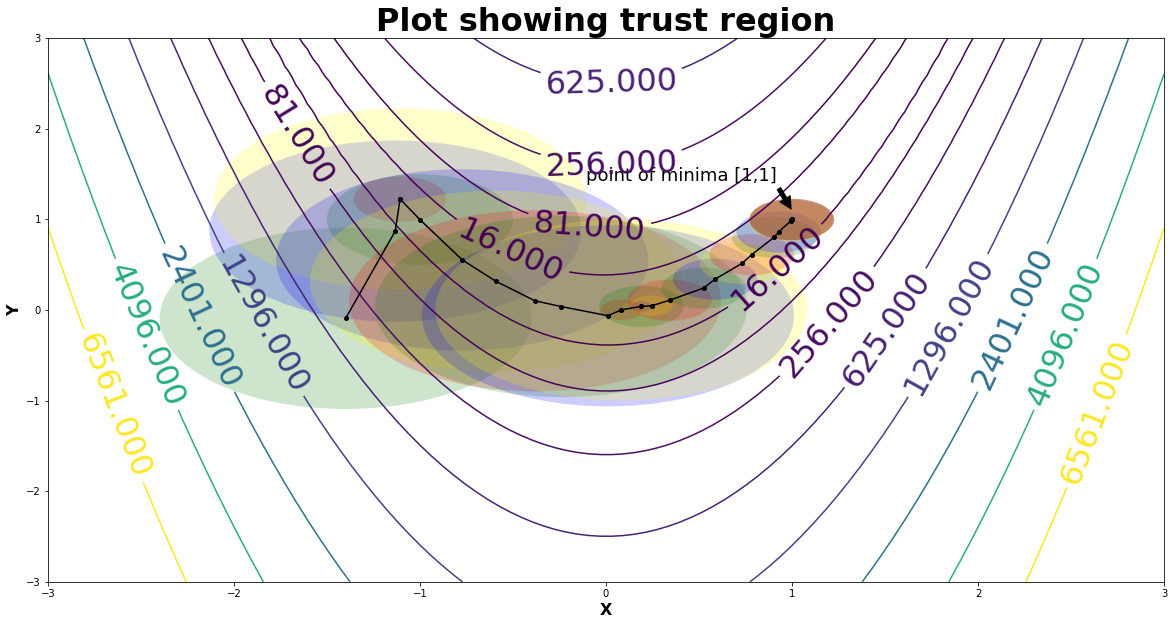

In [272]:
x = np.array([-2,-2]).reshape(-1,1)
update_list,r = trust_region(x,2)
visualize(update_list,r)

(b) [1 point]

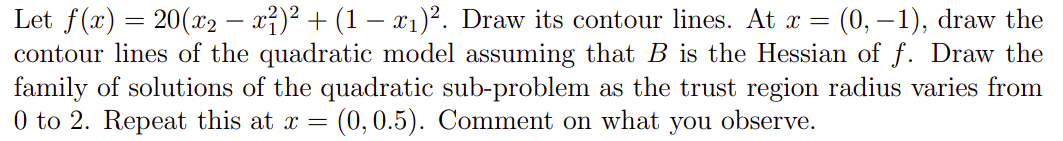

In [202]:
b = 20
def f_(v):
  x = v[0]
  y = v[1]
  return (x - 1)**2 + b*((y - x**2)**2)

def grad_f_(v):
  x = v[0]
  y = v[1]
  f_dot = np.zeros([2,1])
  f_dot[0,0] = 2*(x - 1) + 2*b*(y - x**2)*(-2*x)
  f_dot[1,0] = 2*b*(y - x**2)
  return f_dot

def Hessian_(v):
  x = v[0]
  y = v[1]
  h = np.zeros([2,2])
  h[0,0] = 2 - 4*b*(y - 3*x**2)
  h[0,1] = -4*b*x
  h[1,0] = -4*b*x
  h[1,1] = 2*b
  return h


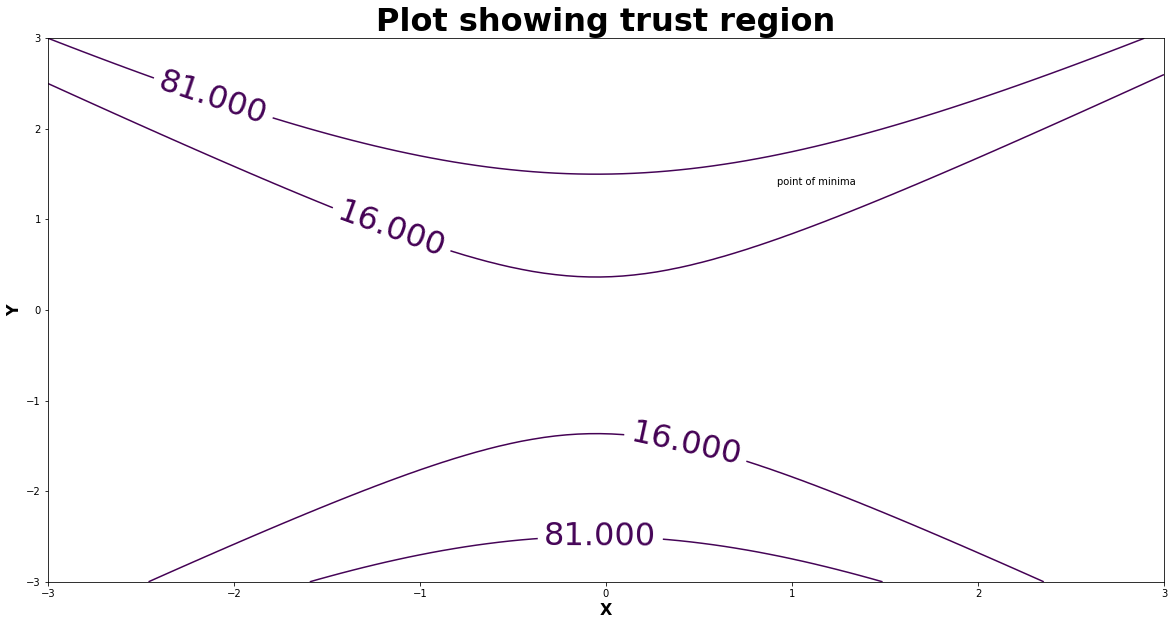

In [213]:
def visualize_(xx,r,ic):
  x = np.linspace(-3, 3, 100)
  y = np.linspace(-3, 3, 100)
  X, Y = np.meshgrid(x, y)
  fk = f_(ic)
  fxk = grad_f_(ic)
  fxxk = Hessian_(ic)
  Z = fk + X*fxk[0][0] + Y*fxk[1][0]+ 0.5 *(fxxk[0][0]*(X**2)+fxxk[1][1]*(Y**2)+(fxxk[0][1]+fxxk[1][0])*X*Y)
  fig, ax = plt.subplots()
  fig.set_figheight(10)
  fig.set_figwidth(20)
  cp = ax.contour(x,y,Z, np.arange(2,10)**4)
  '''ax.plot(xx[:,0],xx[:,1], '-o', color='black', markersize=4)'''
  color = ['red','green','blue','yellow']
  '''for i in range(len(r)):
      circle1 = plt.Circle(xx[i], radius=r[i],facecolor = color[(i+1)%len(color)],alpha = 0.2)
      ax.add_artist(circle1)'''
  ax.clabel(cp, inline=True, fontsize=32)
  ax.set_title('Plot showing trust region', fontsize = 32,fontweight='bold')
  ax.set_xlabel('X',fontsize=16,fontweight='bold')
  ax.set_ylabel('Y',fontsize=16,fontweight='bold')
  ax.annotate('point of minima',
          xy=(1, 1.1), xycoords='data',
          xytext=(-15, 25), textcoords='offset points',
          )

  plt.show()
c1 = np.zeros((2,1))
c1[0][0] = 0
c1[1][0] = 0.5
visualize_(update_list, r,c1)